# Exploratory Data Analysis of IMDB Dataset

This notebook provides a comprehensive exploratory data analysis (EDA) of a movie dataset, utilized within the context of a data science project. The analysis is designed to uncover key insights and patterns within the data, followed by a series of relevant questions to deepen understanding. The project will conclude with the development of a predictive model

The  objective of this challenge extends beyond descriptive statistics; it aims to demonstrate effective problem-solving skills and creative thinking in addressing business-related questions. To achieve this, hypotheses will be formulated and subsequently tested through data analysis and visualizations.I will generate some hypothesis, then they will be tested by data and visualizations.

Throughout the notebook, I will write:
- **Code cells** with analysis.  
- **Markdown explanations** describing each cell and the reasoning behind each analytical step. 
- **Interpretations** sumarizing key findings derived from the results after runnig the code.  

### Step 1: Imports and setting up the environment

In [1]:
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

# Load the dataset and preview basic information

The dataset is provided in CSV format.

The dataset is loaded into a pandas DataFrame and its structure inspected with `.info()` to check data types and missing values.  
Below, display a random sample of rows for a first impression of the data.  

In [2]:
df = pd.read_csv('desafio_indicium_imdb.csv')

In [59]:
df.info()
display(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      999 non-null    int64  
 1   Series_Title    999 non-null    object 
 2   Released_Year   998 non-null    Int64  
 3   Certificate     898 non-null    object 
 4   Runtime         999 non-null    object 
 5   Genre           999 non-null    object 
 6   IMDB_Rating     999 non-null    float64
 7   Overview        999 non-null    object 
 8   Meta_score      842 non-null    float64
 9   Director        999 non-null    object 
 10  Star1           999 non-null    object 
 11  Star2           999 non-null    object 
 12  Star3           999 non-null    object 
 13  Star4           999 non-null    object 
 14  No_of_Votes     999 non-null    int64  
 15  Gross           830 non-null    object 
 16  Gross_clean     830 non-null    float64
 17  Runtime_clean   999 non-null    Int

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,Star2,Star3,Star4,No_of_Votes,Gross,Gross_clean,Runtime_clean,Genre_list,Num_genres,Overview_clean
188,189,Rashômon,1950,NaN,88 min,"Crime, Drama, Mystery",8.2,The rape of a bride and the murder of her samu...,98.0,Akira Kurosawa,...,Machiko Kyô,Masayuki Mori,Takashi Shimura,152572,"96,568",96568.0,88,"[Crime, Drama, Mystery]",3,the rape of a bride and the murder of her samu...
554,555,High Noon,1952,PG,85 min,"Drama, Thriller, Western",7.9,"A town Marshal, despite the disagreements of h...",89.0,Fred Zinnemann,...,Grace Kelly,Thomas Mitchell,Lloyd Bridges,97222,"9,450,000",9450000.0,85,"[Drama, Thriller, Western]",3,a town marshal despite the disagreements of hi...
226,227,Okuribito,2008,PG-13,130 min,"Drama, Music",8.1,A newly unemployed cellist takes a job prepari...,68.0,Yôjirô Takita,...,Ryôko Hirosue,Tsutomu Yamazaki,Kazuko Yoshiyuki,48582,"1,498,210",1498210.0,130,"[Drama, Music]",2,a newly unemployed cellist takes a job prepari...
878,879,Once Upon a Time... in Hollywood,2019,A,161 min,"Comedy, Drama",7.6,A faded television actor and his stunt double ...,83.0,Quentin Tarantino,...,Brad Pitt,Margot Robbie,Emile Hirsch,551309,"142,502,728",142502728.0,161,"[Comedy, Drama]",2,a faded television actor and his stunt double ...
213,214,Barfi!,2012,U,151 min,"Comedy, Drama, Romance",8.1,Three young people learn that love can neither...,NaN,Anurag Basu,...,Priyanka Chopra,Ileana D'Cruz,Saurabh Shukla,75721,"2,804,874",2804874.0,151,"[Comedy, Drama, Romance]",3,three young people learn that love can neither...


#### Some columns were also sampled on text format for a raw visualization of each variable separatedly. 

In [67]:
for c in ['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Meta_score', 'Director', 'No_of_Votes', 'Gross', 'Overview']:
    print(f"\n--- {c} ---")
    print(df[c].sample(5))


--- Series_Title ---
848                    Serpico
662               The Fugitive
192              The Gold Rush
221                  Prisoners
430    Per un pugno di dollari
Name: Series_Title, dtype: object

--- Released_Year ---
982    1979
872    1951
786    2002
402    1989
142    2009
Name: Released_Year, dtype: Int64

--- Certificate ---
875    TV-PG
380      NaN
224        R
822        R
354        A
Name: Certificate, dtype: object

--- Runtime ---
122    107 min
489    138 min
510    119 min
848    130 min
541    172 min
Name: Runtime, dtype: object

--- Genre ---
503                  Drama, Romance
437         Crime, Drama, Film-Noir
404       Animation, Action, Sci-Fi
329    Animation, Adventure, Comedy
398    Animation, Adventure, Comedy
Name: Genre, dtype: object

--- IMDB_Rating ---
647    7.8
224    8.1
757    7.7
577    7.8
189    8.2
Name: IMDB_Rating, dtype: float64

--- Meta_score ---
329    78.0
312    73.0
52     75.0
858    91.0
394    82.0
Name: Meta_score, dt

### Observations from first impressions  

- We can already infer what variables are numerical, categorical or text fields.
- Columns 'Gross', 'Meta_score' and 'Certificate' have missing values.
- Some variables need to be cleaned and converted to numerical:
    - **Released_Year**: Stored as strings.  
    - **Runtime**: Stored as strings with "min", needs conversion to integer.  
    - **Gross**: stored with commas and currency symbols, must be parsed into numeric values.  
    - **Certificate** and **Genre**: Contain categorical text, probably will need normalization (e.g., splitting genres).

Therefore a data cleaning step will be needed before proceeding to deeper analysis. Proper preprocessing will allow reliable correlations and hypothesis testing.  

# Hypotheses

Based on the informations we have, were formulated these 7 hypotheses, along with potential approaches to address them.  
The hypotheses will be considered, tested, verified and either proven or disproven during the analysis.

### H1: Popularity and Gross Revenue
**Hypothesis:** Higher number of votes (popularity) is associated with higher gross revenue.  
- Correlation analysis
- Scatter plot of `No_of_Votes` vs `Gross`
- Group averages by vote quantiles
  
**Note**: It is worth noting that to some extent, this hypothesis is a redundancy, because the number of votes itself is due to the movie’s box office performance. Popular movies attract more viewers and thus generate more votes, creating an inherent link between votes and gross revenue. Therefore, the analysis might not fully capture causality or underlying factors driving both metrics, but I will do it anyway.

### H2: Meta Score vs IMDB Rating
**Hypothesis:** A higher `Meta_score` does not necessarily mean a higher `IMDB_Rating` (critics vs viewers).  
- Correlation analysis
- Scatter plot of `Meta_score` vs `IMDB_Rating`
- Examine and interpret outliers  

### H3: Released Year and Meta Score
**Hypothesis:** Older release years may correlate with higher Metascore.  
- Correlation analysis between Released_Year and Gross
- Scatter/Line Plot: Released_Year vs Meta_score.
- Group Released_Year into decades and compare average metascores.

### H4: Released Year and Gross
**Hypothesis:** New releases years tend to have higher gross revenue, probably due to factors like inflation and increased accessibility or popularity of movies over time.  
- Correlation analysis between Released_Year and Gross
- Scatter/line plot of Released_Year vs Gross
- Group Released_Year into decades and compare average gross revenue across these groups

### H5: Genre, Gross, and Rating Relationship
**Hypothesis:** There is a relationship between genre and both gross revenue and ratings.  
- Handle both single and multiple genres (e.g., split genre strings)
- Analyze genre combinations and their average gross and ratings
- Boxplots of log-transformed gross revenue by genre
- Compare means using t-tests or non-parametric tests  

### H6: Director and Gross
**Hypothesis:** Directors with multiple successful movies (high average gross/rating) may have predictive value.  
- Group data by director
- Compute mean gross and rating per director
- Consider filtering out directors with few movies (low sample size)
- Explore trends across multiple movies per director  

### H7: Star and Gross
**Hypothesis:** Actors influence gross and rating; combinations of directors and actors may have a compounding effect.  
- Analyze actors using the same method applied to directors
- Test combinations of actors + directors and their joint impact on gross/rating  

### H8: External Data - Streaming Trends
**Hypothesis:** Streaming platform releases (e.g., Netflix, Amazon) influence trends in gross and ratings.    
- Compare movies released on streaming platforms vs theatrical
- Examine counts, gross, and ratings by platform

# Data cleaning and creation of new columns
Now that the raw data was inspected, the necessary transformations are applied and new columns are created to prepare the dataset for analysis.

#### Cleaning of numerical columns

In [3]:
# Cleaning
# Gross
def parse_money(x):
    if pd.isna(x):
        return np.nan
    try:
        return float(str(x).replace(',', ''))
    except:
        return np.nan
df['Gross_clean'] = df['Gross'].apply(parse_money)

# Runtime
# no need for null checks on runtime, because as inspected, there are no missing values on this column
df['Runtime_clean'] = df["Runtime"].str.replace(" min", "").astype('Int64') 

# Year
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce').astype('Int64')

#### Text columns
Since 'Genre' has sometimes 1, 2 or 3 listed on the same column, I created the 'Genre_list' and 'Num_genres' variables that might be useful for analysis. 

In [4]:
# Genre
df['Genre_list'] = df['Genre'].fillna('').apply(lambda s: [g.strip() for g in s.split(',')] if s!='' else [])
df['Num_genres'] = df['Genre_list'].apply(len)

#### Quick Validation

After the data cleaning steps, the newly created columns are displayed in a sample table for inspection, and their data types are verified to ensure correctness.

In [10]:
# Table visualization
display(df[['Series_Title', 'Released_Year', 'Runtime_clean', 'Gross_clean', 'Genre_list']].sample(5))
# Type check
print(df.dtypes)

,Series_Title,Released_Year,Runtime_clean,Gross_clean,Genre_list
177,Monty Python and the Holy Grail,1975,91,1229197.0,"[Adventure, Comedy, Fantasy]"
959,Sleepers,1996,147,49100000.0,"[Crime, Drama, Thriller]"
516,Boogie Nights,1997,155,26400640.0,[Drama]
648,The Insider,1999,157,28965197.0,"[Biography, Drama, Thriller]"
793,Hedwig and the Angry Inch,2001,95,3029081.0,"[Comedy, Drama, Music]"


Unnamed: 0         int64
Series_Title      object
Released_Year      Int64
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
Gross_clean      float64
Runtime_clean      Int64
Genre_list        object
Num_genres         int64
dtype: object


#### Numeric columns assigned to a variable, and their statistical summary generated
Numeric columns are assigned to a varible for future analysis.  
To understand the general characteristics of the dataset, descriptive statistics for key numeric columns were computed:  
Used `.describe()` to obtain counts, means, standard deviations, quartiles, and ranges. This shows a first quantitative overview and helps identify potential outliers.  

In [14]:
# Variable assignment
numeric_cols = ['Released_Year','Runtime_clean','IMDB_Rating','Meta_score','Gross_clean','Num_genres']
# Statistical summary
df[numeric_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Released_Year,998.0,1991.214429,23.308539,1920.0,1976.0,1999.0,2009.0,2020.0
Runtime_clean,999.0,122.871872,28.101227,45.0,103.0,119.0,137.0,321.0
IMDB_Rating,999.0,7.947948,0.27229,7.6,7.7,7.9,8.1,9.2
Meta_score,842.0,77.969121,12.383257,28.0,70.0,79.0,87.0,100.0
Gross_clean,830.0,68082574.104819,109807553.385723,1305.0,3245338.5,23457439.5,80876340.25,936662225.0
Num_genres,999.0,2.542543,0.675911,1.0,2.0,3.0,3.0,3.0


#### Observations from Data Cleaning

From the descriptive statistics:  

- **Released_Year**  
   - Most movies are recent (25th percentile = 1976, 75th percentile = 2009).  
   - The range goes back to 1920, showing some older films are included.  

- **Runtime_clean**  
   - Average runtime is ~123 minutes.  
   - Some extreme values (min = 45, max = 321) might represent unusually short or very long movies.  

- **IMDB_Rating**  
   - Ratings are tightly clustered (mean ~7.95, std ~0.27), indicating most movies are generally well-rated.  
   - Range from 7.6 to 9.2 — no very low-rated films in this dataset.  

- **Meta_score**  
   - Some missing values (count = 842 out of 999).  
   - Mean ~78, indicating mostly positive critical reception.  

- **Gross_clean**  
   - Highly skewed distribution (mean = 68M, max = 936M).  
   - The large standard deviation suggests strong outliers (blockbusters).  

- **Num_genres**  
   - Most movies have 2–3 genres; single-genre movies are rare.

With the data cleaned and initial checks complete, we can now move on to visual exploration of numeric variables, which will help reveal patterns, distributions, and potential relationships between movie characteristics and box office success.  

# Plotting of numeric variables
#### Distribution of IMDB_Rating, Meta_score, Runtime and Gross
With the dataset cleaned and modified, we now turn to visual exploration of numeric variables.  
This helps us understand the distribution and variability of key movie features.  

- **IMDB Rating** (audience evaluation)  
- **Meta Score** (critic evaluation)  
- **Runtime** (movie duration in minutes)  
- **Gross** (box office revenue, log-transformed to reduce skewness)  

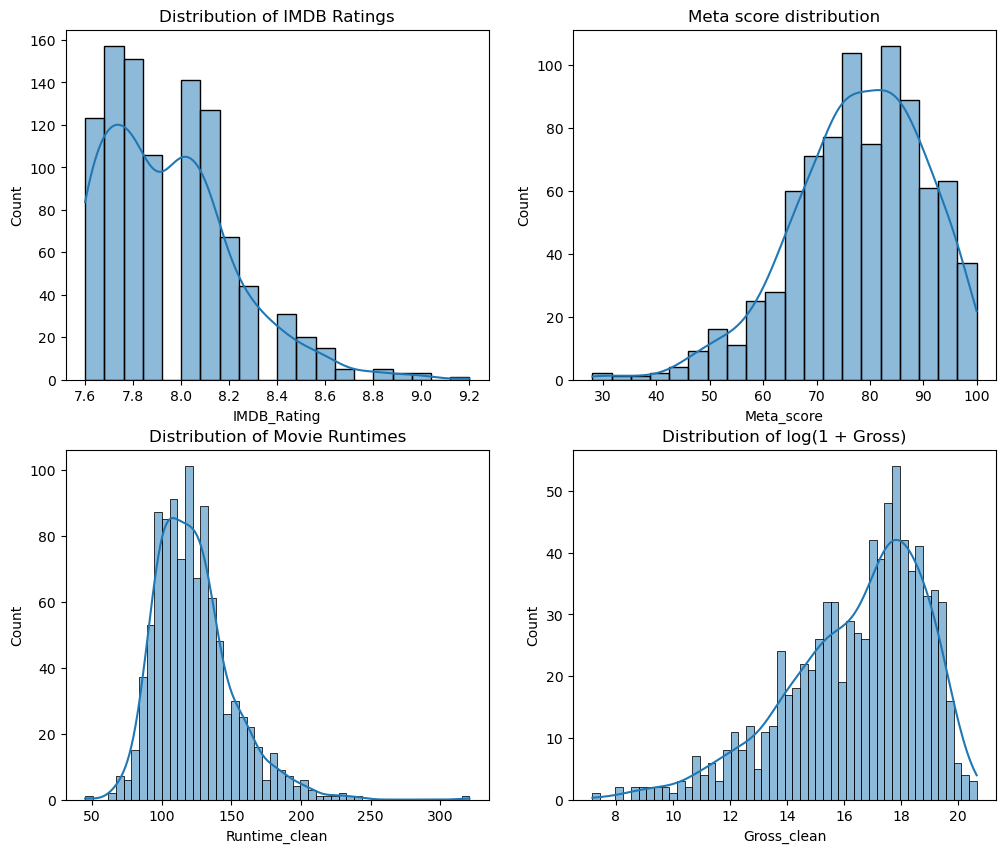

<Figure size 640x480 with 0 Axes>

In [102]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Create 2x2 grid

# Distribution of IMDB ratings
sns.histplot(df["IMDB_Rating"], bins=20, kde=True, ax=axs[0, 0])
axs[0, 0].set_title("Distribution of IMDB Ratings")

# Distribution of Meta score
sns.histplot(df['Meta_score'].dropna(), bins=20, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Meta score distribution')
axs[0, 1].set_xlabel('Meta_score')

# Distribution of Runtime
sns.histplot(df["Runtime_clean"], bins=50, kde=True, ax=axs[1, 0])
axs[1, 0].set_title("Distribution of Movie Runtimes")

# Distribution of Gross (logarithmic)
sns.histplot(np.log1p(df['Gross_clean'].dropna()), bins=50, kde=True)
plt.title('Distribution of log(1 + Gross)')
plt.show()

plt.tight_layout()  # Adjust spacing between plots
plt.show()

#### Scatterplot

Since both Gross and Runtime contain outliers and exhibit skewness, I will use scatter plots to better visualize these outliers. Additionally, Gross will be log1p normalized, as some of the outliers are extremely distant from the rest of the data.  
Also, the actual values of the top and bottom outliers were printed in text.

##### Scatterplot of Gross

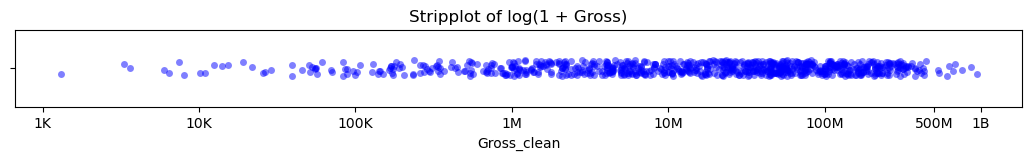

High outliers:

                              Series_Title  Gross_clean
Star Wars: Episode VII - The Force Awakens  936662225.0
                         Avengers: Endgame  858373000.0
                                    Avatar  760507625.0
                    Avengers: Infinity War  678815482.0
                                   Titanic  659325379.0
                              The Avengers  623279547.0
                             Incredibles 2  608581744.0
                           The Dark Knight  534858444.0
                                 Rogue One  532177324.0
Low outliers:

             Series_Title  Gross_clean
              Adams æbler       1305.0
Knockin' on Heaven's Door       3296.0
               Mr. Nobody       3600.0
         Dead Man's Shoes       6013.0
                  Ajeossi       6460.0
                    Udaan       7461.0
           Tropa de Elite       8060.0
            All About Eve      10177.0
                    Dev.D      10950.0


In [169]:
# Scatterplot
plt.figure(figsize=(13, 1))
sns.stripplot(x=np.log1p(df['Gross_clean'].dropna()), jitter=True, color='blue', alpha=0.5)

# I chose the values to demark the real gross value for visual reference and determine the tick positions
actual_values = [1000, 10000, 100000, 1000000, 10000000, 100000000, 500000000, 1000000000]

# log1p the actual values because it was plotted using log1p
tick_positions = np.log1p(actual_values)
tick_values = ['1K', '10K', '100K', '1M', '10M', '100M', '500M', '1B']
plt.xticks(tick_positions, tick_values)
plt.title('Stripplot of log(1 + Gross)')
plt.show()


# Print in raw text
high_threshold = df['Gross_clean'].quantile(0.99)  # top 1%
low_threshold = df['Gross_clean'].quantile(0.01)   # bottom 1%

high_gross_movies = df[df['Gross_clean'] > high_threshold]
low_gross_movies = df[df['Gross_clean'] < low_threshold]

print("High outliers:\n")
print(high_gross_movies[['Series_Title', 'Gross_clean']].sort_values(by='Gross_clean', ascending=False).to_string(index=False))

print("Low outliers:\n")
print(low_gross_movies[['Series_Title', 'Gross_clean']].sort_values(by='Gross_clean', ascending=True).to_string(index=False))

According to this analysis there are some movies with very high gross, over 500M. The majority of movies are grossed on the millions, while a significant amount grossed between 100k to 1M. There are very few movies in the thousands (<100k) and the number decreases as the earnings drop. This again shows that the dataset has more popular movies than a random movie dataset.

##### Scatterplot of Runtime

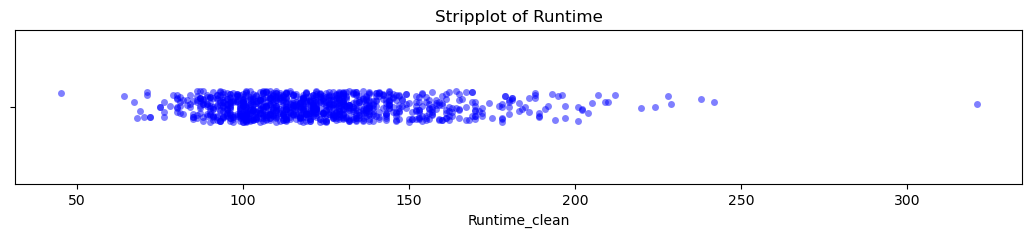

High outliers:

 Runtime_clean                Series_Title
           321          Gangs of Wasseypur
           242                      Hamlet
           238          Gone with the Wind
           229 Once Upon a Time in America
           228          Lawrence of Arabia
Low outliers:

 Runtime_clean Series_Title
            45 Sherlock Jr.
            64       Freaks
            67  The General
            68      The Kid
            69    Duck Soup


In [175]:
# Scatterplot
plt.figure(figsize=(13, 2))
sns.stripplot(x=df['Runtime_clean'].dropna(), jitter=True, color='blue', alpha=0.5)
plt.title('Stripplot of Runtime')
plt.show()

# Print the top and bottom 0.5% in raw text
high_threshold = df['Runtime_clean'].quantile(0.995)  # top 0.5%
low_threshold = df['Runtime_clean'].quantile(0.005)   # bottom 0.5%

high_runtime_movies = df[df['Runtime_clean'] > high_threshold]
low_runtime_movies = df[df['Runtime_clean'] < low_threshold]

print("High outliers:\n")
print(high_runtime_movies[['Runtime_clean', 'Series_Title']].sort_values(by='Runtime_clean', ascending=False).to_string(index=False))

print("Low outliers:\n")
print(low_runtime_movies[['Runtime_clean', 'Series_Title']].sort_values(by='Runtime_clean', ascending=True).to_string(index=False))

The analysis indicates that the runtime is generally consistent, with most movies ranging between 1 and 2 hours. There are a small but notable number exceeding 150 minutes, and very few that run over 3 hours. Only one movie has a runtime of less than an hour.

#### Releases per Year
Since there is 100 years and I wanted to show them all, I made a bigger graphic, with bars for each year ranged from 1920 to 2020.

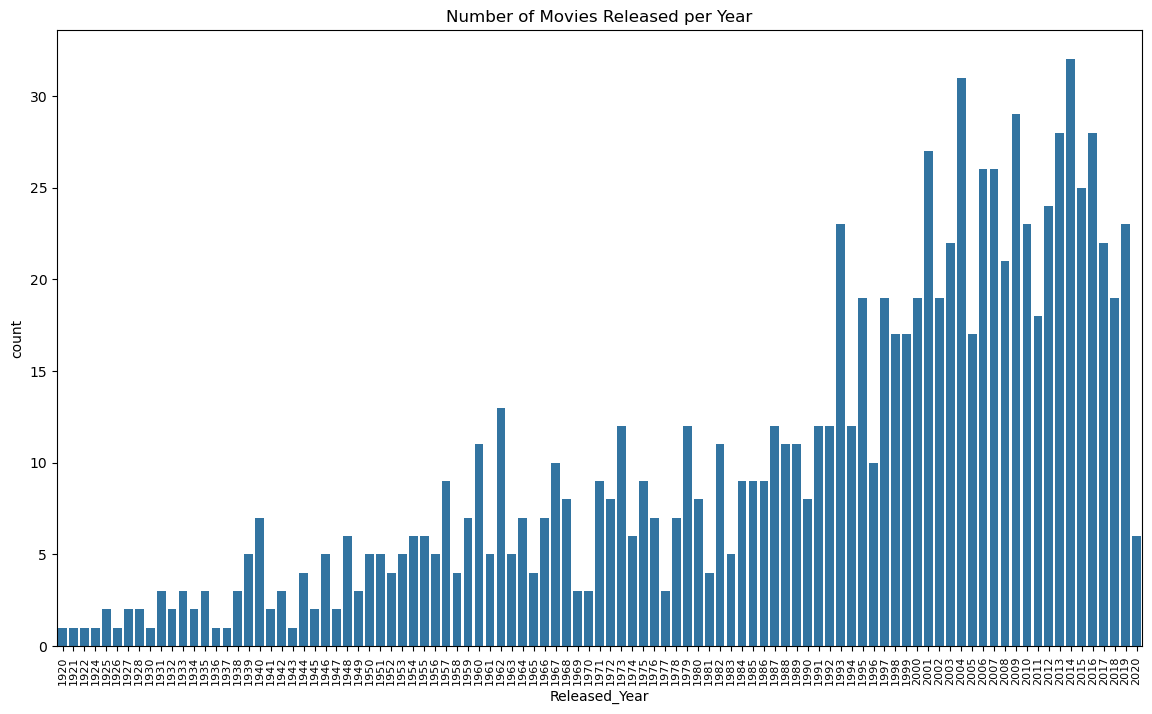

In [105]:
# Movie releases over time
plt.figure(figsize=(14, 8))
sns.countplot(x="Released_Year", data=df, order=sorted(df["Released_Year"].dropna().unique()))
plt.xticks(rotation=90,fontsize=8)
plt.title("Number of Movies Released per Year")
plt.show()

#### Observations

- **IMDB Ratings**: The histogram is heavily concentrated between 7.7 and 8.1, and a distribution with very little variation. Outliers on the high side (9.0–9.2) correspond to classics such as The Dark Knight and Pulp Fiction. This indicates the dataset is curated toward high-quality films.

- **Meta Score**:The histogram shows a roughly normal distribution, centered around 75–80, with tails down to ~30. A cluster at the top (90–100) indicates critically acclaimed films.

- **Runtime**: Runtime is consistent, varying between 110–130 minutes, with a mode expected around 120 min.

- **Gross**:The Gross log histogram smooths the extreme skew, showing a more balanced spread. A few mega-hits (500M) dominate the high end, while most films cluster around 10M–100M.

- **Released_Year**: The count plot shows a sharp increase from 1990 onward, peaking in the 2000s and 2010s. Very few films appear before 1960. This confirms a sampling bias: the dataset is not representative of all movies but of notable/recognized ones. Year must always be included as a control to avoid spurious trends.

**Note**: Gross must be inflation-adjusted for fair comparisons across decades. Without that, older movies may look artificially “small” compared to modern blockbusters.

# Exploring Categorical Columns

Now, the categorical attributes will be explored in text form. The visualizations will be showed when doing the bivariate analysis.  
Checking the most frequent values for:  
- **Directors**  
- **Actors (Star1, Star2, Star3)**  
- **Certificates**  
- **Genres**  

### Directors and Stars

In [111]:
print('\nTop directors:')
display(df['Director'].value_counts().head(10))

print('\nTop Star1 actors:')
display(df['Star1'].value_counts().head(10))

print('\nTop Star2 actors:')
display(df['Star2'].value_counts().head(10))

print('\nTop Star3 actors:')
display(df['Star3'].value_counts().head(10))


Top directors:


Director
Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Akira Kurosawa       10
Martin Scorsese      10
Stanley Kubrick       9
Woody Allen           9
Billy Wilder          9
David Fincher         8
Quentin Tarantino     8
Name: count, dtype: int64


Top Star1 actors:


Star1
Tom Hanks            12
Robert De Niro       11
Al Pacino            10
Clint Eastwood       10
Humphrey Bogart       9
Leonardo DiCaprio     9
Johnny Depp           8
Christian Bale        8
James Stewart         8
Toshirô Mifune        7
Name: count, dtype: int64


Top Star2 actors:


Star2
Emma Watson     7
Matt Damon      5
Ian McKellen    4
Diane Keaton    4
Chris Evans     4
Julie Delpy     4
Meryl Streep    4
Brad Pitt       4
Ed Harris       4
Kate Winslet    4
Name: count, dtype: int64


Top Star3 actors:


Star3
Rupert Grint           5
John Goodman           4
Jennifer Connelly      4
Scarlett Johansson     4
Samuel L. Jackson      4
Carrie Fisher          4
Joe Pesci              4
Rachel McAdams         4
Nawazuddin Siddiqui    3
Edward Norton          3
Name: count, dtype: int64

The dataset highlights many of the most influential filmmakers. This again shows the dataset is curated toward canonical cinema classics and auteur directors dominate, rather than random sampling of movies. The same occurs with actors, the most famous and recognized actors appears on most movies on the dataset. Also, many top actors are tied to franchises, which may drive gross figures disproportionately.  
From that, we see that the same celebrities are always on the most popular movies.

### Genres

Genres were analysed either by combinations: as strings, and as originally defined on the csv file; and by separated genres: using the created 'Genre_list', in which each genre was counted separatedly, if it appears on the row.

In [ ]:
genre_counts = df['Genre_list'].explode().value_counts()
print('\nTop Genres:')
display(genre_counts.head(10))

print('\nTop Genre Combinations:')
display(df['Genre'].value_counts().head(10))

Most frequent: Drama (723), Comedy (233), Crime (209), Adventure (196), Action (189).
Drama alone accounts for ~72% of all films (often combined with other genres).  
The dataset is dominated by Drama, either solo or in combinations.  
Since Drama is hugely more frequent, if we exclude it from the analysis, the most popular genres on the dataset are: Comedy, Crime, Action, Thriller and Romance. The same genres are also frequent in combinations: with Romance and Comedy on the top, then Crime, Action and Thriller. 

**Hypothesis**: Genre mix likely affects both ratings and gross. For instance, dramas may dominate IMDB ratings, while action/adventure may dominate gross

### Certificates

In [115]:
print('\nTop Certificates:')
display(df['Certificate'].value_counts())


Top Certificates:


Certificate
U           234
A           196
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64

Most frequent: U (234), A (196), UA (175), and R (146).  
American ratings (PG, PG-13, R) appear, but Indian-style ratings (U, UA, A) are much more frequent.

# Bivariate Analysis

## Correlation Heatmap 
To understand how the main numerical variables relate to each other, we calculate the correlation matrix. This helps identify whether variables move together (positive correlation) or in opposite directions (negative correlation). Strong correlations may suggest redundancy or predictive relationships.

Hypotheses tested and verified:  
- Higher No_of_Votes (popularity) is associated with higher Gross. (Test: correlation + scatter plot + group averages by vote quantile.)  
- Higher Meta_score does not necessarily mean higher IMDB_Rating (critics vs viewers). (Test: correlation + scatter + examine outliers.)  
- Runtime influences ratings (very short/very long runtimes may correlate with lower/higher IMDB ratings). (Test: runtime bins vs mean rating.)
- Released_Year influences Meta_score (older movies might have higher Meta_score). (Test: correlation + scatter + examine outliers.)    

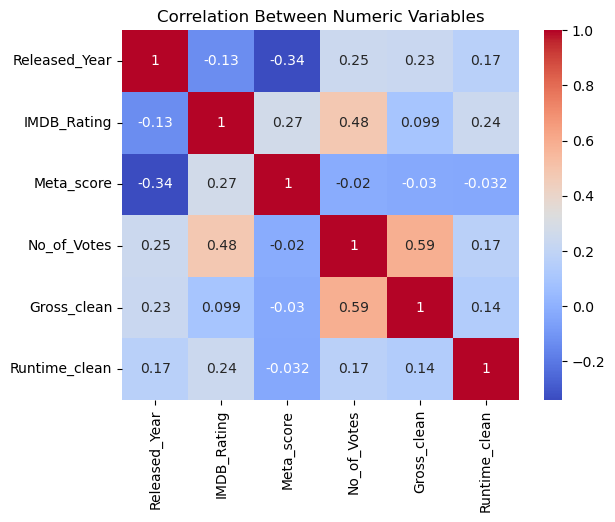

In [18]:
corr = df[["Released_Year", "IMDB_Rating", "Meta_score", "No_of_Votes", "Gross_clean", "Runtime_clean"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Variables")
plt.show()

In [ ]:
corr = df[["Released_Year", "IMDB_Rating", "Meta_score", "No_of_Votes", "Gross_clean", "Runtime_clean"]].corr()
print(corr)

#### From the correlation matrix, we can infer that:

- IMDB Rating & No. of Votes: 0.48  
    Popular movies (more votes) tend to have slightly higher ratings.  

- IMDB Rating & Meta_score: 0.27  
    There is not a tendency for critics and audience ratings to align. Often they diverge.  
    Confirm Hypothesis 2.
  
- Gross_clean & No. of Votes: 0.59  
    Higher-grossing movies typically receive more votes, due to wider distribution and audience exposure.  
    Confirm Hypothesis 1.

- Released Year & Meta_score: -0.34  
    Older movies may have slightly higher MetaScores, or newer movies score lower on MetaScore. Could reflect shifting critic standards or nostalgia bias.  
    Confirm Hypothesis 3.

- Released Year & Gross_clean: 0.23  
    More recent movies tend to make slightly more money, likely due to inflation or larger market reach.
    Confirms Hypothesis 4.

- Runtime & IMDB Rating: 0.24  
  Slight trend suggesting longer movies may receive better ratings.

- Gross_clean & IMDB Rating: 0.10  
  High-grossing movies don’t necessarily have higher IMDB ratings. Box office and quality (as perceived by users) are weakly related.

### Scatterplot of correlations
The most meaningful correlations are scattered for a better visualization of outliers and other notable patterns.
- Meta_score and Released_Year
- Gross_clean and Released_Year
- IMDB_Rating and Meta_score
- IMDB_Rating and Runtime_clean

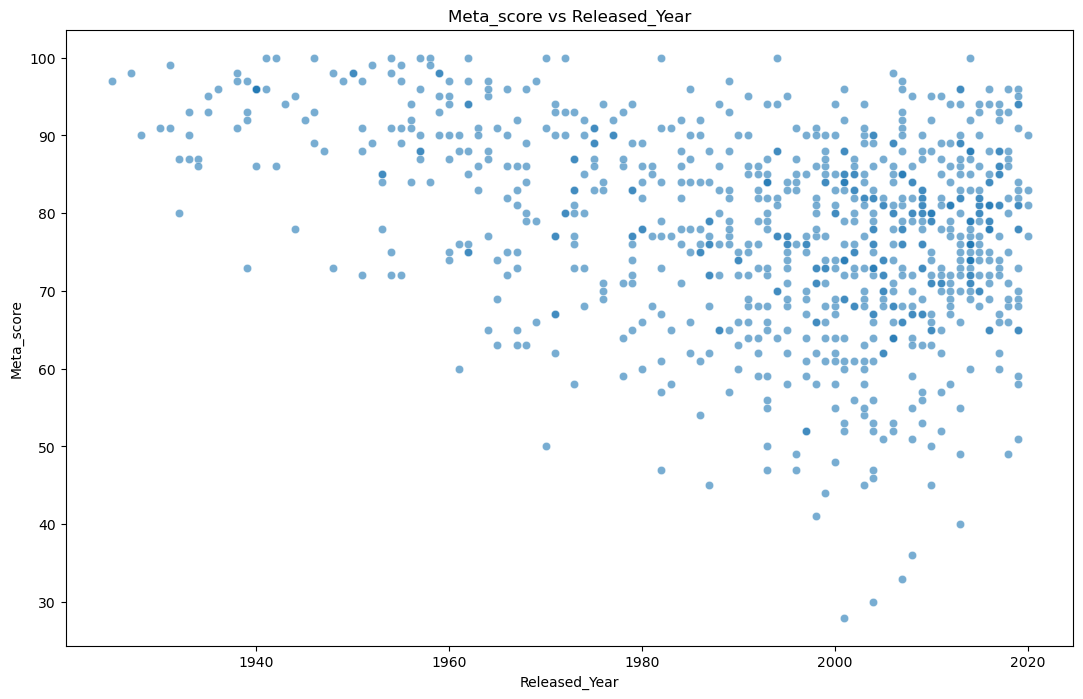

In [154]:
plt.figure(figsize=(13, 8))
# Meta_score vs Released_Year
sns.scatterplot(data=df, x="Released_Year", y="Meta_score", alpha=0.6)
plt.title("Meta_score vs Released_Year")
plt.show()

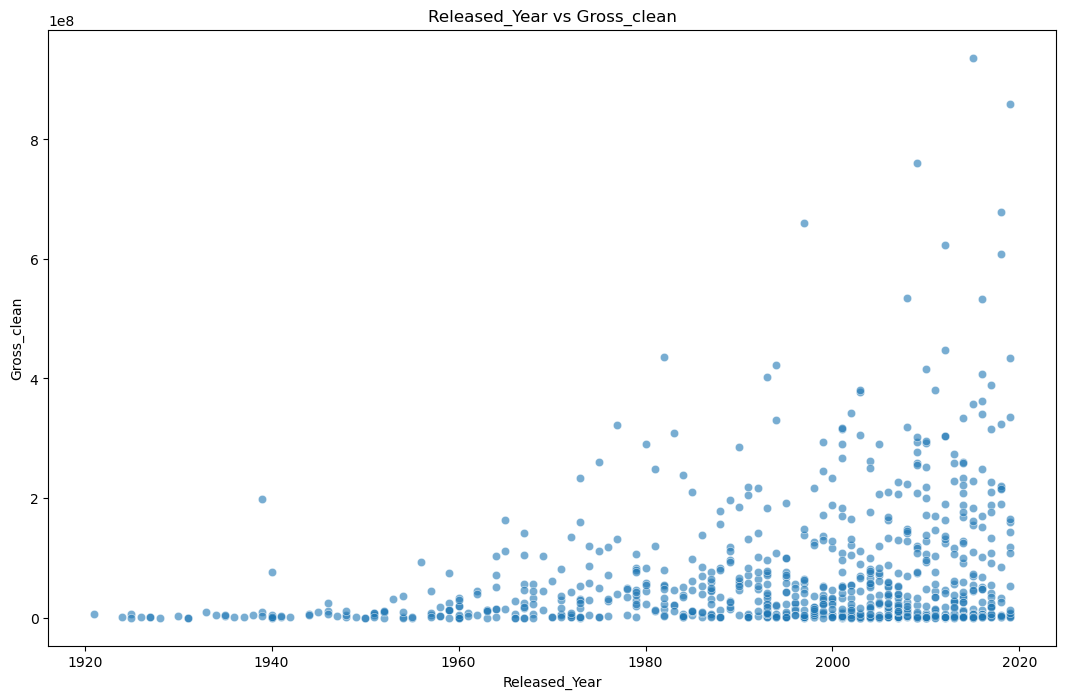

In [156]:
plt.figure(figsize=(13, 8))
# Gross_clean vs Released_Year
sns.scatterplot(data=df, x="Released_Year", y="Gross_clean", alpha=0.6)
plt.title("Released_Year vs Gross_clean")
plt.show()

Text(0.5, 1.0, 'IMDB Rating vs Runtime_clean')

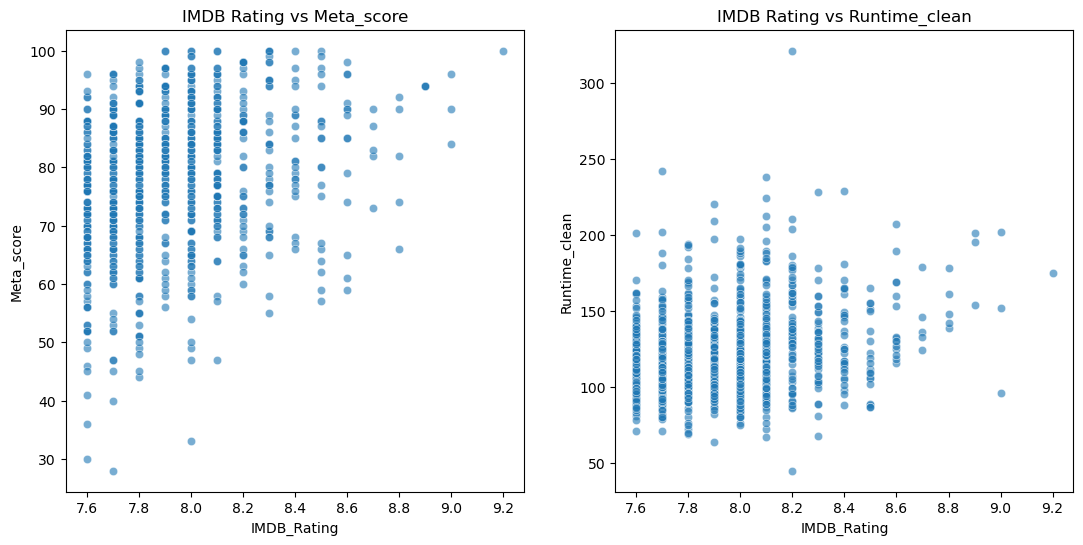

In [160]:
# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# IMDB_Rating vs Meta_score
sns.scatterplot(data=df, x="IMDB_Rating", y="Meta_score", alpha=0.6, ax=axes[0])
axes[0].set_title("IMDB Rating vs Meta_score")

# IMDB_Rating vs Runtime_clean
sns.scatterplot(data=df, x="IMDB_Rating", y="Runtime_clean", alpha=0.6, ax=axes[1])
axes[1].set_title("IMDB Rating vs Runtime_clean")

#### Scatterplot insights

- Recent films show wider variation but slightly lower critic scores on average.

- Outliers: Some older movies with exceptional box office success (e.g., Titanic) still stand out against newer blockbusters.

- IMDB_Rating vs Meta_score

- Slightly positive relationship between IMDB_Rating and Meta_score, showing that audiences and critics often agree. However, scatter indicates differences in evaluation:  
    . Some movies loved by fans but not critics (high IMDB, low Meta).  
    . Some movies praised by critics but underappreciated by audiences (high Meta, lower IMDB).  
Outliers are interesting cases worth highlighting (cult classics or divisive films).

- Weak but noticeable positive association between IMDB_Rating and Runtime_clean. However, the scatter is wide, both short and long movies can achieve high or low ratings.

# Questions

### Movie Recommendation for an Unknown Viewer

To provide an objective and justifiable recommendation, we define criteria based on widely accepted indicators of movie quality and popularity, we have to think about a general audience: something widely appealing, well-received, and accessible.  
A good general recommendation should ideally satisfy:  
- High IMDb rating – indicates strong general audience approval.
- High number of votes – ensures that the rating is reliable and not from just a few people.
- Decent box office/gross – usually means it had broad appeal.
- Popular genre – something many people like, like Adventure, Comedy, Action, or Family.  

For broader appeal, movies can also be filtered by certificate or runtime, e.g. movies under 2 hours, to increase the likelihood that a general audience will enjoy them. So:
- Accessible runtime, not too long or too short.
- Avoid movies with very restrictive certifications for a general audience recommendation.

By applying this, we identify movies that are popular, highly rated, and statistically significant. These are safe recommendations for someone whose preferences are unknown.

In [ ]:
# Filter criteria
recommended = df[
    (df['IMDB_Rating'] >= 8.5) & # high rating
    (df['No_of_Votes'] >= 10000) & # enough votes
    (df['Gross_clean'].notna()) &
    (df['Runtime_clean'] >= 90) & (df['Runtime_clean'] <= 180) & # reasonable runtime
    (df['Released_Year'] >= 1990) & # not too old
    (~df['Certificate'].isin(['A', 'R'])) # reasonable restriction
]

# Sort by rating and votes
recommended = recommended.sort_values(by=['IMDB_Rating', 'No_of_Votes'], ascending=False)

# Show top recommendation
top_movie = recommended.iloc[0]
print(top_movie[['Series_Title', 'Released_Year', 'Genre', 'IMDB_Rating', 'No_of_Votes', 'Director', 'Star1']])

This is a nice recommendation that fills all the checks:   

- IMDb Rating: Very high (9+).  
- Number of Votes: Large enough to trust the score.  
- Genre: Action with broad appeal.  
- Standard runtime and certificate not so restricted makes it accessible for most audiences.  
- Superhero movies are popular and appealing.  
- Famous celebrities.  

For someone I don’t know, I would recommend “The Dark Knight”.

### What are the main factors associated with a high box office revenue for a film?

In this question the 'Gross' column will be compared to all the others.   
From the analysis made using the correlation matrix, we already know the numerical variables that are associated with 'Gross'.  

- No_of_Votes: 0.59 (strongest but redundant)  
- Released_Year: 0.23 (newer films tend to gross more)  
- Runtime: 0.14 (tiny positive)  

Considerations:  
Gross_clean missing for ~16.9% of films; Meta_score missing for ~15.7%.
This sample is biased toward well-rated movies (top IMDb titles), so results reflect “high-quality / popular” films rather than the full market.
Again, the inflation can overstate the advantage of newer films.

#### Comparing Gross with text columns

We now assess categorical drivers of revenue. We group by multi-genre combinations and individual genres (after splitting), then by director and lead actor. To reduce noise, we filter to categories with adequate support (n > 10 for genres, n > 5 for directors/actors). Our hypotheses: tentpole genres, proven directors, and major stars will show higher average grosses.

##### Gross per genre

We test whether some genres systematically earn more. Because movies often have multiple genres, we analyze both:  
- Genre combos (exact strings) and
- Individual genres via Genre_list = Genre.str.split(", ") + explode.
To avoid noise, we filter to categories with n > 10.

##### Top multi-genre combos by avg gross (n>10):  
- Action, Adventure, Sci-Fi = \$281M (n=21)
- Animation, Adventure, Comedy = \$225M (n=20)
- Action, Adventure, Drama = \$222M (n=12)

##### Top single genres by avg gross (n>10):
- Adventure = \$166M (n=170)
- Sci-Fi = \$148M (n=61)
- Action = \$141M (n=156)
- Animation = \$128M (n=67)

As expected, Action/Adventure/Sci-Fi and family-friendly Animation combos dominate by average gross (e.g., Action-Adventure-Sci-Fi = 281M). For single genres, Adventure (166M), Sci-Fi (148M), Action (141M), and Animation (128M) lead—consistent with broad appeal and franchise potential.

In [47]:
# Group by the 'Genre' column
genre_stats = (
    df.groupby("Genre")
      .agg(
          Count=('Gross_clean', 'count'),
          AvgGross=('Gross_clean', 'mean')
      )
)

# Filter out rare genres (less than 10 movies)
genre_stats = genre_stats[genre_stats['Count'] > 10].sort_values('AvgGross', ascending=False)

# Format AvgGross as currency
genre_stats['AvgGross'] = genre_stats['AvgGross'].map('${:,.2f}'.format)

# Display the top 10 genres by average gross
print(genre_stats.head(10))

                              Count         AvgGross
Genre                                               
Action, Adventure, Sci-Fi        21  $280,888,545.67
Animation, Adventure, Comedy     20  $225,166,879.90
Action, Adventure, Drama         12  $222,402,968.83
Drama, Romance                   31   $63,319,097.39
Biography, Crime, Drama          15   $62,439,966.53
Action, Crime, Drama             22   $59,501,898.05
Biography, Drama, History        23   $55,332,522.91
Biography, Drama                 11   $53,782,359.00
Crime, Drama, Thriller           25   $50,278,553.64
Comedy                           13   $47,695,288.77


##### Using Genre_list to see if the word appears

In [ ]:
# Explode Genre_list so each genre gets its own row
df_exploded = df.explode("Genre_list")

# Group by individual genres
genre_stats = (
    df_exploded.groupby("Genre_list")
    .agg(
        Count=('Gross_clean', 'count'),
        AvgGross=('Gross_clean', 'mean')
    )
)

genre_stats = genre_stats[genre_stats['Count'] > 10].sort_values('AvgGross', ascending=False)

genre_stats['AvgGross'] = genre_stats['AvgGross'].map('${:,.2f}'.format)

print(genre_stats.head(10))

##### Gross per Director and Star1

We check whether certain directors or lead actors (Star1) are associated with higher grosses. To minimize small-sample noise, we keep creators with >5 films in the dataset.  

##### Directors:  
- Christopher Nolan — avg = \$242M (n=8)
- Steven Spielberg — avg = \$191M (n=13)
- Ridley Scott — avg = \$128M (n=6)

Directors with consistent blockbuster access (e.g., Christopher Nolan ≈ 242M avg; Steven Spielberg ≈ 191M) are associated with higher grosses, likely capturing budget, IP, and marketing scale in addition to brand reputation. 

##### Lead actors:
- Daniel Radcliffe — avg = \$305M (n=9)
- Johnny Depp — avg = \$61M (n=12)
- Christian Bale — avg = \$169M (n=8)

Celebrity power appears associated with higher grosses, though it’s often entangled with genre and director, again, plausibly reflecting access to larger commercial projects.

##### Director

In [ ]:
# Group by 'Director'
genre_stats = (
    df.groupby("Director")
      .agg(
          Count=('Gross_clean', 'count'),
          AvgGross=('Gross_clean', 'mean')
      )
)

genre_stats = genre_stats[genre_stats['Count'] > 5].sort_values('AvgGross', ascending=False)

genre_stats['AvgGross'] = genre_stats['AvgGross'].map('${:,.2f}'.format)

print(genre_stats.head(10))

##### Star1

In [ ]:
# Group by 'Star1'
genre_stats = (
    df.groupby("Star1")
      .agg(
          Count=('Gross_clean', 'count'),
          AvgGross=('Gross_clean', 'mean')
      )
)

genre_stats = genre_stats[genre_stats['Count'] > 5].sort_values('AvgGross', ascending=False)

genre_stats['AvgGross'] = genre_stats['AvgGross'].map('${:,.2f}'.format)

print(genre_stats.head(10))

##### Gross per Certificate

Broad-audience categories are associated with higher grosses.  
UA/U (parental guidance/family-friendly) have much higher averages than R/A.

In [ ]:
# Group by 'Certificate'
genre_stats = (
    df.groupby("Certificate")
      .agg(
          Count=('Gross_clean', 'count'),
          AvgGross=('Gross_clean', 'mean')
      )
      .sort_values('AvgGross', ascending=False)
)

genre_stats['AvgGross'] = genre_stats['AvgGross'].map('${:,.2f}'.format)

print(genre_stats.head(10))

#### Conclusion

Answering the question, what drives the box office in this dataset are these factors:

- Reach/awareness (No_of_Votes) is the clearest driver. Marketing scale, distribution breadth, and franchise fandom matter most.
- Commercial genres (Action/Adventure/Sci-Fi) are associated with higher revenue—broad appeal + effects + franchiseability.
- Proven directors and top-billed stars correlate with higher grosses—likely because they attract budgets, marketing, and global releases.
- Release year / market scale helps (inflation, global box office)—but the effect is second-order after popularity.
- Ratings and runtime have weak direct links; great movies can underperform commercially and vice-versa.

### What insights can be derived from the "Overview" column? Is it possible to infer the genre of the movie from this column?

##### Exploring the "Overview" Column by Genre

The Overview column contains short text descriptions of each movie’s plot.
To understand whether these texts can help us infer genres, I applied text preprocessing and extracted the most frequent words per genre.

**Preprocessing Steps**

- Converted all text to lowercase (to avoid duplicates like "Love" vs. "love").
- Removed punctuation and numbers, keeping only alphabetic characters.
- Applied a Bag of Words (CountVectorizer) representation with the top 5000 most frequent words.
- Excluded common English stopwords (e.g., "the", "and", "is").
This allowed us to convert the free-text "Overview" into structured features.

**Genre Filtering**

Movies often belong to multiple genres (e.g., "Comedy, Drama"). So, similarly as I did by creating 'Genre_list', I split the Genre column and built counters to identify the Top 10 most frequent genres in the dataset.

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Preprocessing helper
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation/numbers
    return text

# Clean Overview
df['Overview_clean'] = df['Overview'].fillna('').apply(clean_text)

# Bag of Words
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['Overview_clean'])
bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Count movies per genre
genre_counter = Counter()
for g in df['Genre'].dropna():
    for genre in g.split(','):
        genre_counter[genre.strip()] += 1

# Top 10 genres
top_genres = [g for g,_ in genre_counter.most_common(10)]
print("Top 10 genres:", top_genres)

# Print top 10 most frequent words for each top genre
print("\nTop 10 words per genre:\n")
for genre in top_genres:
    mask = df['Genre'].str.contains(genre, na=False)
    genre_words = bow[mask].sum().sort_values(ascending=False)
    top_words = genre_words.head(20).index.tolist()
    print(f"{genre}: {', '.join(top_words)}")
    print('---')

Top 10 genres: ['Drama', 'Comedy', 'Crime', 'Adventure', 'Action', 'Thriller', 'Romance', 'Biography', 'Mystery', 'Animation']

Top 10 words per genre:

Drama: young, man, life, world, story, war, woman, new, love, family, finds, son, boy, help, girl, years, lives, father, friends, wife
---
Comedy: young, man, new, friends, love, life, family, girl, finds, world, school, day, lives, woman, help, set, american, boy, high, living
---
Crime: young, man, murder, crime, police, family, life, story, finds, violent, agent, city, men, years, mob, prison, new, friends, tries, killer
---
Adventure: young, world, new, war, man, family, help, boy, friends, girl, save, journey, team, group, story, search, home, mission, american, set
---
Action: young, man, world, war, family, battle, team, save, officer, help, new, agent, leads, police, army, future, city, stop, assassin, group
---
Thriller: man, young, police, agent, woman, world, goes, life, help, city, finds, crime, war, years, killer, murder, 

#### Answering the Question

1. The Overview column provides a textual summary of each movie, describing its plot, characters, setting, and main events. By analyzing the most frequent words in the overviews for the top 10 genres, we can identify common themes and elements associated with each genre.

    For example:
    - Drama: Words like life, world, story, woman, love, family, finds, help, girl, lives, friends, wife, indicate that drama movies often focus on human relationships, personal struggles, and life events.
    - Comedy: Words like friends, love, life, girl, school, day, woman, help, set, american, suggest humorous, lighthearted situations often centered on social interactions.
    - Crime: Words like murder, crime, police, family, life, story, violent, agent, city, mob, prison, tries, killer point to themes of law, criminal activity, and suspense.
    - Adventure: Words like world, new, war, girl, save, journey, team, group, story, search, home, mission show a purposeful plot.
    - Action: Words such as battle, team, save, officer, help, new, agent, group, show that these movies involve quests, conflict, and high-stakes scenarios.
    - Romance: Words like love, woman, man, falls, friendship highlight relationship-focused plots.
    - Animation: Words like princess, toy, home, friends, quest indicate family-friendly, imaginative stories.
    
    These frequent words summarize the core themes, characters, and plot elements in each genre and highlight the distinct “signature vocabulary” of different types of movies.

2. Can Genre Be Inferred from the Overview?

    Yes. The analysis shows that, besides a lot of these words are common to most genres, still each genre has distinctive keywords that appear repeatedly in its overviews, crime movies consistently mention words related to law, murder, and investigation, romance and drama frequently contain words about love, family, and relationships, adventure and action contain words about journeys, battles, or missions.
    
    This implies that it is possible to infer the genre from the overview, at least to some extent. A text-based model (like a bag-of-words or TF-IDF classifier) could be trained on these overviews to predict genres, especially for genres with strong thematic vocabulary.
    
    By analyzing frequent words, we can identify the genre with reasonable accuracy and gain insights into the plot structure, character focus, and typical story elements for each type of movie.

# Prediction Model

### HistGradientBoostingRegressor

Since the target variable (`IMDB_Rating`) is continuous, this is a regression problem.  
For this task, I selected the **HistGradientBoostingRegressor**, an implementation of gradient boosting that is optimized for speed and efficiency. It is particularly well-suited for structured/tabular datasets with a mix of numerical and categorical features, like the IMDb dataset.

From the EDA, the variables that orrelate with IMDB_Rating are:

- **Numerical predictors:**  
    - Released_Year: could matter (older classics vs newer).
    - Runtime: must be converted from "142 min" → integer minutes.
    - Meta_score: strongly correlated with IMDB_Rating.
    - No_of_Votes: popularity tends to correlate with higher ratings.
    - Gross:  needs cleaning (remove commas, convert to float).  


- **Categorical predictors:**  
    - Certificate: encode as categorical.
    - Genre: split into multiple genres (multi-hot encoding).
    - Director, Stars: high-cardinality; use frequency encoding or just consider top N frequent ones.


**Variables Transformations and Preprocessing:**
- Cleaned and transformed `Runtime`, `Gross`, and `Released_Year` into numeric values.
- Scaled numerical variables (`Released_Year`, `Runtime`, `Meta_score`, `No_of_Votes`, `Gross`).
- One-hot encoded categorical variables (`Certificate`, `Genre`, `Director`, `Star1–Star4`).
- Built a preprocessing pipeline with `ColumnTransformer` to ensure reproducibility and avoid data leakage.


**Choice of model**
This model uses histogram-based binning, making training significantly faster and more memory-efficient than traditional gradient boosting, also the model natively supports missing values in numerical features, which makes preprocessing simpler. It handles non-linear relationships and complex feature interactions better than linear models.

**Model Parameters:**
- `max_iter=300`: number of boosting iterations.
- `learning_rate=0.05`: shrinkage factor, balancing bias and variance.
- `max_depth=6`: controls tree complexity to prevent overfitting.
- `random_state=42`: ensures reproducibility.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.metrics import r2_score
import joblib

# Load data
df = pd.read_csv("desafio_indicium_imdb.csv")

# Transformations
# Clean runtime
df['Runtime'] = df['Runtime'].str.extract(r'(\d+)').astype(float)

# Clean Gross
df['Gross'] = df['Gross'].replace(',', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Handle Released_Year
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Select features
features = ['Released_Year','Runtime','Certificate','Genre','Meta_score',
            'Director','Star1','Star2','Star3','Star4','No_of_Votes','Gross']
target = 'IMDB_Rating'

X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
numeric_features = ['Released_Year','Runtime','Meta_score','No_of_Votes','Gross']
categorical_features = ['Certificate','Genre','Director','Star1','Star2','Star3','Star4']

# HistGradientBoosting handles missing values natively, but not raw strings.
# We'll encode categoricals as one-hot.
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model pipeline
modelH = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', HistGradientBoostingRegressor(
        max_iter=300,        # number of boosting iterations
        learning_rate=0.05,  # shrinkage
        max_depth=6,         # tree depth
        random_state=42))
])

# Train
modelH.fit(X_train, y_train)

# Evaluate
y_pred = modelH.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R²: {r2:.3f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.3f}")

**Evaluation Metrics:**
- **R² = 0.388** → The model explains ~39% of the variance in IMDb ratings.
- **MSE = 0.0401** → On average, squared prediction errors are ~0.04 points.
- **RMSE = 0.200** → Predictions deviate from the true IMDb rating by ~0.2 on the 1–10 scale.

Although the R² value indicates there is room for improvement, the RMSE of **0.20** shows that the model is fairly precise in predicting IMDb ratings, given the complexity of human perception of movies. This performance is acceptable as a first predictive approach, especially considering the high variability in audience preferences and qualitative factors not fully captured in the dataset.

In [ ]:
# Saving model
joblib.dump(modelH, "model_hgb.pkl")

#### Predicting IMDB Rating using HistGradientBoostingRegressor

In [ ]:
shawshank = {
    'Released_Year': 1994,
    'Runtime': 142,
    'Certificate': 'A',
    'Genre': 'Drama',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': 28341469
}

shawshank_df = pd.DataFrame([shawshank])
predicted_rating = modelH.predict(shawshank_df)[0]
print(f"Predicted IMDb Rating (HistGradientBR): {predicted_rating:.2f}")

### GradientBoostingRegressor

**Choice of model**
- Captures non-linearities better than linear models.
- Handles feature interactions automatically.
- Parameters used:
  - `n_estimators=500`: number of boosting stages (trees).
  - `learning_rate=0.05`: step size shrinkage to prevent overfitting.
  - `max_depth=4`: controls the complexity of each tree.
- This model requires preprocessed input (scaling + one-hot encoding), which I handled with a `ColumnTransformer` inside a pipeline.
- I had to include `X = X.dropna(); y = y.loc[X.index]`, since it does not handle well missing values.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Load data
df = pd.read_csv("desafio_indicium_imdb.csv")

# Transformations
# Clean runtime
df['Runtime'] = df['Runtime'].str.extract(r'(\d+)').astype(float)

# Clean Gross
df['Gross'] = df['Gross'].replace(',', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Handle Released_Year
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Select features
features = ['Released_Year','Runtime','Certificate','Genre','Meta_score',
            'Director','Star1','Star2','Star3','Star4','No_of_Votes','Gross']
target = 'IMDB_Rating'

X = df[features]
y = df[target]

X = X.dropna()
y = y.loc[X.index]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
numeric_features = ['Released_Year','Runtime','Meta_score','No_of_Votes','Gross']
categorical_features = ['Certificate','Genre','Director','Star1','Star2','Star3','Star4']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model pipeline with Gradient Boosting
modelG = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=500,      # number of trees
        learning_rate=0.05,    # shrinkage
        max_depth=4,           # depth of each tree
        random_state=42))
])

# Train
modelG.fit(X_train, y_train)

# Evaluate
y_pred = modelG.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R²: {r2:.3f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.3f}")

**Evaluation Metrics:**
- **R² = 0.534**: The model explains ~53% of the variance in IMDb ratings.
- **MSE = 0.0390**: On average, squared prediction errors are ~0.039 points.
- **RMSE = 0.197**: Predictions deviate from the true IMDb rating by ~0.20 on the 1–10 scale.

With an R² of 0.53, the model captures over half of the variability in IMDb ratings, indicating a moderately strong fit. The RMSE of 0.197 suggests that predictions are fairly close to actual ratings.

In [ ]:
# Saving model
joblib.dump(modelG, "model_gb.pkl")

#### Predicting IMDB Rating using GradientBoostingRegressor

In [ ]:
shawshank = {
    'Released_Year': 1994,
    'Runtime': 142,
    'Certificate': 'A',
    'Genre': 'Drama',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': 28341469
}

shawshank_df = pd.DataFrame([shawshank])
predicted_rating = modelG.predict(shawshank_df)[0]
print(f"Predicted IMDb Rating (GradientBR): {predicted_rating:.2f}")

**Comparison**
- While **HistGradientBoostingRegressor** is more scalable and efficient, in this dataset the classic **GradientBoostingRegressor** achieved better predictive performance, with a notably higher R² (0.534 vs. 0.388) and slightly lower RMSE (0.197 vs. 0.200).
- This difference may be explained by the relatively small dataset size, where the efficiency advantages of histogram-based methods are less relevant, and the more traditional boosting approach benefits from deeper optimization.
- Both models show reasonable predictive power, but **GradientBoostingRegressor currently provides the best fit** for this problem.

**Conclusion**  
By testing multiple boosting approaches, I was able to confirm that ensemble methods outperform simpler baselines for predicting IMDb scores. GradientBoostingRegressor will be kept as the primary model, while HistGradientBoostingRegressor remains a strong alternative for larger datasets or scenarios requiring faster training.